In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from fastai.vision import *
from pathlib import Path
from fastai.callbacks.oversampling import OverSamplingCallback

In [3]:
path = Path('/home/rubn/Desktop/og')

In [6]:
dx = ImageList.from_folder(path).split_by_folder(train='train', valid='val').label_from_folder().databunch().normalize(imagenet_stats)

In [7]:
dx

ImageDataBunch;

Train: LabelList (5515 items)
x: ImageList
Image (3, 300, 1000),Image (3, 300, 1000),Image (3, 300, 1000),Image (3, 300, 1000),Image (3, 300, 1000)
y: CategoryList
Healthy,Healthy,Healthy,Healthy,Healthy
Path: /home/rubn/Desktop/og;

Valid: LabelList (1383 items)
x: ImageList
Image (3, 300, 1000),Image (3, 300, 1000),Image (3, 300, 1000),Image (3, 300, 1000),Image (3, 300, 1000)
y: CategoryList
Healthy,Healthy,Healthy,Healthy,Healthy
Path: /home/rubn/Desktop/og;

Test: None

In [8]:
learn = cnn_learner(dx, models.vgg19_bn, callback_fns=[OverSamplingCallback])

In [9]:
learn.data.batch_size = 8

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 8.32E-06
Min loss divided by 10: 1.00E-08


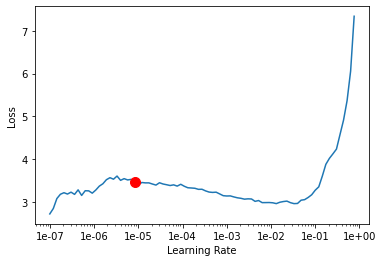

In [11]:
learn.lr_find()
learn.recorder.plot(skip_start=0, skip_end=2, suggestion=True)

In [12]:
lr = 1e-05

In [13]:
learn.fit_one_cycle(4, slice(lr))

epoch,train_loss,valid_loss,time
0,2.106524,1.607784,52:11
1,1.585514,1.320734,52:25
2,1.543291,1.350548,52:27
3,1.428477,1.335503,52:23


In [14]:
learn.unfreeze()
learn.freeze_to(3)
learn.fit_one_cycle(2, max_lr=slice(lr/100, lr/10))  

epoch,train_loss,valid_loss,time
0,1.394792,1.250054,52:13
1,1.522765,1.454730,52:09


In [15]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

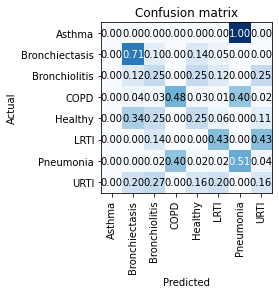

In [16]:
interp.plot_confusion_matrix(normalize=True)